第十一章：输入和输出

11.1 标准输入
有时，我们需要让用户以交互方式输入一些内容。我们可以使用 input() 函数来实现这一点——你在测验Q1的问题中已经看到了这种用法。

input() 接受一个字符串作为参数，该字符串将作为提示显示给用户。用户将被提示输入一个值并按下回车键，这个值将作为字符串 str 被返回。

In [4]:
# 让用户输入一个数字，并将其赋值给变量
your_number = input('请输入一个数字并按回车：')
print(your_number)
print(type(your_number))

6
<class 'str'>


In [5]:
#如果你要求的是数字数据，那么需要将返回的值 转换 成 int 或 float。
your_number = float(input('请输入一个数字并按回车：'))
print(f'{your_number} 除以 3 的结果是 {your_number / 3}.')

6.0 除以 3 的结果是 2.0.


Exercise 11.1
以下代码生成了一个 1 到 100 之间的随机整数 target。你需要编写一个数字猜谜游戏的代码：询问用户的初始猜测，并告诉他们猜的数字太大、太小，还是猜对了。如果没猜对，则继续询问他们再次猜测，直到找到正确的数字。
提示：你需要使用 while 循环。


In [6]:
import numpy as np

rng = np.random.default_rng()
target = rng.integers(1, 101)
print(target)
number = float(input('请输入一个数字并按回车：'))
while True:
    if number<target:
        number=int(input('比该数小，重新输入：'))
    elif number>target:
        number=int(input('比该数大，重新输入：'))
    else:  
        print(f'{number} 正确.')
        break

ModuleNotFoundError: No module named 'numpy'

11.2 文件读取
Python 在处理数据方面表现出色——这是过去十年左右它受到广泛关注的原因之一。我们可以处理多种不同类型的数据，如文本、二进制文件、电子表格等。而且还有多种方式从文件中访问数据，并将结果保存到文件中。

我们将首先讨论如何从 文本 文件中打开并读取数据。课程后面我们会学到更多关于处理其他文件类型的方法（如 CSV 文件、二进制文件等）。

11.2.1 基础文件处理

你可以使用 open() 函数以不同的模式打开一个文件。打开文件后，我们可以逐行读取文件内容。以下是如何以“读取”模式打开一个文件，并使用 .readline() 方法逐行读取内容：

In [17]:
#注意路径

with open('/Users/chenji/Desktop/编程/week4/mytextfile.txt', 'r') as myfile:
    print(myfile.readline())   # 读取第一行
    print(myfile.readline())   # 读取第二行

Hello, I am text for your Python Programming Course. This is my first line.

I want to tell you: YOU ARE WONDERFUL! Now I am finishing my second line.



2.2 使用 with 语句

使用 with 语句时，我们不需要显式地关闭文件。当退出 with 语句时，文件会自动关闭，这使得代码更加整洁。下面是如何使用 with 来处理文件的例子：

In [18]:
with open('/Users/chenji/Desktop/编程/week4/mytextfile.txt', 'r') as myfile:
    for line in myfile:
        print(line.strip())  # 输出每行内容

Hello, I am text for your Python Programming Course. This is my first line.
I want to tell you: YOU ARE WONDERFUL! Now I am finishing my second line.
It is rude not to say goodbye, so I am finishing my third line by saying BYE!


Exercise 11.2
完成下面的代码，依次读取文件中的所有行，直到文件末尾，并将它们存储在列表all_lines中。您既可以使用.readlines()(搜索文档!)，也可以使用.readline()使用while循环逐行读取文本。

In [26]:
#第一种方法:使用'readline'
with open('/Users/chenji/Desktop/编程/week4/mytextfile.txt', 'r') as myfile:
    # 初始化一个空列表来存储行
    all_lines = []

    # 如果line为空，则到达文件结束
    while True:
        line = myfile.readline()
        # 当到达空行时中断循环(记住布尔类型转换!)
        if not line:
            break
        # 如果仍然有非空行，则追加到列表
        all_lines.append(line)
print(all_lines)

['Hello, I am text for your Python Programming Course. This is my first line.\n', 'I want to tell you: YOU ARE WONDERFUL! Now I am finishing my second line.\n', 'It is rude not to say goodbye, so I am finishing my third line by saying BYE!\n']


3 写入文件
我们还可以将文本写入文件，这通常是存储计算结果的好方法，因为我们常常需要计算出答案并能够以后参考。

在 Python 中，我们可以通过使用 open() 函数并传入参数 'w'（代表“写模式”）来创建一个新的文本文件并打开它。我们需要将输出写入文件中，而不是显示在屏幕上。以下是如何操作的示例——使用文件对象的 .write() 方法：


In [ ]:
text1 = 'Here is the text to write into the file.'
text2 = 'Here is the second line of text to write into the file.'

#with open('mytextfile_new.txt', 'w') as mynewfile:
    #mynewfile.write(text1 + '\n')
    #mynewfile.write(text2 + '\n')

练习 11.3
编写代码逐行读取 mytextfile.txt 的内容，并在每一行前添加行号和 ': '。

In [ ]:
# Read the file, store the lines in a list
with open('/Users/chenji/Desktop/编程/week4/mytextfile.txt', 'r') as myfile:
    all_lines = myfile.readlines()

with open('textfile_linenumber.txt', 'w') as newfile:
    count = 1
    for line in all_lines:
        newfile.write(f'{count}: {line}')
        count += 1

第十二章：命名空间和作用域
命名空间和作用域是理解 Python 中非常重要的概念，尤其是在你已经学会编写自己的函数，并且开始使用更多模块时。

1. 命名空间

大致来说，命名空间 是名称的集合，以及它们所指向的对象。它是 Python 用来根据名称查找内存中对象的表。
如果我们再次使用抽屉或盒子的类比，给盒子贴上一个新标签就是将这个名称添加到命名空间
。
在这个例子中，我们首先将名称 a 和 b 添加到命名空间——也就是说，我们在内存中的两个盒子上贴上了 a 和 b 的标签。然后，当我们让 Python 计算并打印 a + b 时，它会查看命名空间来找到名为 a 和 b 的盒子。同时，它也会查找名为 print 的盒子（这个盒子里装着能够让我们将内容显示到屏幕上的函数）。

由于 d 不在命名空间中（没有名为 d 的盒子），Python 无法找到它，因此会返回 NameError 错误。

In [27]:
a = 5
b = 2
print(a + b)
print(d)


7


NameError: name 'd' is not defined

2. 作用域

当你运行一个 Python 脚本时，通常会创建多个命名空间。作用域 是代码中的一个部分，你可以从中访问某个命名空间——也就是说，你可以在该作用域中通过直接输入名称来找到该命名空间中的对象。

通过一个例子来解释作用域会更为清晰：

In [ ]:
#第一种方法:使用'readline'
with open('/Users/chenji/Desktop/编程/week4/mytextfile.txt', 'r') as myfile:
    # 初始化一个空列表来存储行
    all_lines = []

    # 如果line为空，则到达文件结束
    while True:
        line = myfile.readline()
        # 当到达空行时中断循环(记住布尔类型转换!)
        if not line:
            break
        # 如果仍然有非空行，则追加到列表
        all_lines.append(line)
print(all_lines)

['Hello, I am text for your Python Programming Course. This is my first line.\n', 'I want to tell you: YOU ARE WONDERFUL! Now I am finishing my second line.\n', 'It is rude not to say goodbye, so I am finishing my third line by saying BYE!\n']


第十二章：命名空间和作用域
命名空间和作用域是理解 Python 中非常重要的概念，尤其是在你已经学会编写自己的函数，并且开始使用更多模块时。

12.1. 命名空间

大致来说，命名空间 是名称的集合，以及它们所指向的对象。它是 Python 用来根据名称查找内存中对象的表。
如果我们再次使用抽屉或盒子的类比，给盒子贴上一个新标签就是将这个名称添加到命名空间。
在这个例子中，我们首先将名称 a 和 b 添加到命名空间——也就是说，我们在内存中的两个盒子上贴上了 a 和 b 的标签。然后，当我们让 Python 计算并打印 a + b 时，它会查看命名空间来找到名为 a 和 b 的盒子。同时，它也会查找名为 print 的盒子（这个盒子里装着能够让我们将内容显示到屏幕上的函数）。

由于 d 不在命名空间中（没有名为 d 的盒子），Python 无法找到它，因此会返回 NameError 错误。



In [ ]:
a = 5
b = 2
print(a + b)
print(d)

11.2. 作用域
当你运行一个 Python 脚本时，通常会创建多个命名空间。作用域 是代码中的一个部分，你可以从中访问某个命名空间——也就是说，你可以在该作用域中通过直接输入名称来找到该命名空间中的对象。
通过一个例子来解释作用域会更为清晰：

在这个代码中，函数 func() 在被调用时，会创建一个命名空间。所有在函数内创建的变量（如 inside）都会添加到函数的命名空间中。我们可以在函数内使用这些变量，比如在第 7 行打印 inside。此时代码在局部作用域中运行。
需要注意的是，即使 outside 变量不属于函数的命名空间，我们仍然可以在函数内部打印 outside。这是因为 outside 是在全局作用域中定义的。如果 Python 在局部作用域中找不到 outside，它会在全局作用域中寻找。



In [29]:
outside = 7

def func():
    inside = 2
    print('Inside the function...')
    print(outside)
    print(inside)

func()

print('Now we are outside...')
print(outside)
print(inside)

Inside the function...
7
2
Now we are outside...
7


In [31]:
outside = 7
def func():
    print(outside)

def func2():
    print(outside)
    outside = 1
   
func()
func2()
#运行此代码时，func2() 将引发错误，因为在该函数中，Python 会首先在局部作用域中找到 outside，
# 但它在找到前就试图打印出 outside 的值，而此时变量还未被赋值。

7
1


练习12.1
考虑以下代码。在标记为 # 1, # 2, # 3, # 4, # 5 的行中，哪些变量 a, b, c, d 是可用的？它们的值是什么？


In [36]:

a = 10

def outer_function():
    b = 8.4
    # 1

    def inner_function():
        c = -0.3
        # 2 在这里，我们不能访问c，因为它只有可用在inner_function()的作用域中
        return c
    
    d = inner_function()
    # 3

    return a

# 4
print(a)
b = outer_function()
# 5
print(a, b)

10
10 10


第十三章：Numpy数组
我们之前已经介绍过 Numpy 模块，当时我们使用了一些数学函数来计算值（例如 np.cos()、np.sqrt()）。Numpy 的另一个有用功能是 ndarray 类型（即 N 维数组，通常被称为“Numpy 数组”）。Numpy 数组是一种像列表一样的容器，可以有效地存储和处理向量与矩阵。

  13.1. 手动创建数组

我们可以使用 np.array() 函数来创建数组。它接受一个列表作为输入参数，并返回一个数组，其中每一行都是列表的元素。例如，创建一个向量或矩阵：

In [9]:
# 首先导入 Numpy
import numpy as np
# 创建一个向量
v = np.array([3, 4, -2.8, 0])
print(v)
print(type(v))

# 创建一个矩阵：向 np.array() 传递一个列表的列表，每个列表代表矩阵的一行
id_4 = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 1, 0],
                 [0, 0, 0, 1]])
print(id_4)

# 使用 np.array() 的第二个（可选）输入参数指定元素类型：
id_4_float = np.array([[1, 0, 0, 0],
                       [0, 1, 0, 0],
                       [0, 0, 1, 0],
                       [0, 0, 0, 1]], dtype=float)
print(id_4_float)

ModuleNotFoundError: No module named 'numpy'

2. 构造数组的一些有用函数

Numpy 还提供了许多有用的函数来构造具有特定属性的数组，例如：

np.zeros()、np.ones()：创建全为零或全为一的数组
np.eye()：生成单位矩阵
np.random.random()、np.random.randint()：生成随机实数或随机整数矩阵
np.arange()、np.linspace()：生成等间隔的向量

In [42]:
# 创建一个零矩阵
A = np.zeros([3, 4])
print(A)

# 创建一个单位矩阵
I = np.eye(3)
print(I)

# 创建一个由随机数构成的矩阵
R = np.random.random([2, 3])
print(R)

# 创建一个等间隔的向量 (不包含10)
v = np.arange(0, 10, 2)
print(v)

# 使用 linspace 创建等间隔的向量（包含1）
v_lin = np.linspace(0, 1, 5)
print(v_lin)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0.1619178  0.26730974 0.56022034]
 [0.5965493  0.01121818 0.74507073]]
[0 2 4 6 8]
[0.   0.25 0.5  0.75 1.  ]


练习13.1
创建两个变量M和y，赋值为Numpy数组，表示定义为的矩阵和向量

In [3]:
import numpy as np
M=np.array([[9,3,0],[-2,-2,1],[0,-1,-1]])
print(M)
y = np.array([0.4, -3, -0.3])
x=y.T#转置
print(y)

ModuleNotFoundError: No module named 'numpy'

13.3. 按元素操作（Element-wise operations）
基本运算符 +, -, *, /, 和 ** 可以用于对两个相同大小的数组，或数组与数字之间进行按元素操作。

In [9]:
import numpy as np

# 构建一个矩阵 A
A = 0.1 * np.array([[1, 2, 3],
                    [4, 5, 6],
                    [7, 8, 9]])
print("A = ")
print(A)

# 构建一个单位矩阵 B
B = np.eye(3)

print("\nA + B =")
print(A + B)

print("\nA - B =")
print(A - B)

print("\nA * B =")
print(A * B)

print("\nA ** 2 =")
print(A ** 2)

print("\nB / A =")
print(B / A)

A = 
[[0.1 0.2 0.3]
 [0.4 0.5 0.6]
 [0.7 0.8 0.9]]

A + B =
[[1.1 0.2 0.3]
 [0.4 1.5 0.6]
 [0.7 0.8 1.9]]

A - B =
[[-0.9  0.2  0.3]
 [ 0.4 -0.5  0.6]
 [ 0.7  0.8 -0.1]]

A * B =
[[0.1 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  0.9]]

A ** 2 =
[[0.01 0.04 0.09]
 [0.16 0.25 0.36]
 [0.49 0.64 0.81]]

B / A =
[[10.          0.          0.        ]
 [ 0.          2.          0.        ]
 [ 0.          0.          1.11111111]]


练习13.2
编写一个函数 dot_prod()，它接受两个输入参数 u 和 v，两个均为 1D Numpy 数组（向量），
并返回两个向量的点积。代码必须为单行（包括 def 语句和计算在内）。

In [10]:
import numpy as np
def dot_prod(u,v):
    return np.sum(u * v)

13.4. Numpy 数组的索引和切片（Indexing and slicing Numpy arrays）
要访问 Numpy 数组中某个位置的元素，可以像操作其他序列一样使用索引。不同的是，N 维 Numpy 数组中的元素由 N 个整数索引，每个索引代表沿某维度的元素位置。

In [15]:
# 创建一个 4x4 的矩阵
A = np.arange(1/4, 17/4, 1/4).reshape((4, 4))
#np.arange(1/4, 17/4, 1/4)：使用 arange 函数创建了一个从 0.25（即 1/4）
# 到 4.0（即 17/4）的数组，步长为 0.25。这将生成 16 个元素。
#reshape((4, 4))：将生成的数组重塑为 4x4 的矩阵，即 4 行 4 列。
print(A)

# 访问第 2 行第 4 列的元素
print(A[1, 3])

# 访问第 1 行的所有元素
print(A[0, :])

# 访问所有行的第 3 列
print(A[:, 2])

# 访问从第 2 行到最后一行、从第 1 列到倒数第 2 列的元素
print(A[2:, :-1])

# 从第 0 行开始，每隔一行，访问第 2 列的元素
print(A[0::2, 1])

[[0.25 0.5  0.75 1.  ]
 [1.25 1.5  1.75 2.  ]
 [2.25 2.5  2.75 3.  ]
 [3.25 3.5  3.75 4.  ]]
2.0
[0.25 0.5  0.75 1.  ]
[0.75 1.75 2.75 3.75]
[[2.25 2.5  2.75]
 [3.25 3.5  3.75]]
[0.5 2.5]


练习 13.3
运行以下代码，并解释所有命令的作用：

In [17]:
import numpy as np
rng = np.random.default_rng() #创建一个新的随机数生成器 rng。
A = rng.integers(1, 11, size=[3, 5])
print(A)
A5 = A < 5
print(A5)
print('\n')
print(A[A5]) #A[A5]：这是一个布尔索引操作，返回 A 中所有满足 A < 5 条件的元素。
#布尔矩阵 A5 的 True 对应的元素会被保留下来，False 对应的元素会被过滤掉。

print(A[1:, :3]) 
#A[1:, :3]：这是一种矩阵切片操作，表示取矩阵 A 的第 2 行到最后一行（1: 表示从索引 1 开始），
# 以及前 3 列（:3 表示取到第 3 列）。

print(A[1:, :3][A5[1:, :3]])
#A5[1:, :3]：对布尔矩阵 A5 做相同的切片操作，取第 2 行到最后一行和前 3 列的元素。
#A[1:, :3][A5[1:, :3]]：使用这个布尔切片对矩阵 A 中相同部分进行过滤，只保留满足 A5[1:, :3] 为 True 的那些元素，即小于 5 的元素。
#print(A[1:, :3][A5[1:, :3]])：输出这个子矩阵中小于 5 的元素。

A[np.logical_not(A5)] = 100 #将所有不小于 5 的元素替换为 100
print(A)

[[ 3  2  6  8 10]
 [10 10  1  6  7]
 [ 4  4  3  3  1]]
[[ True  True False False False]
 [False False  True False False]
 [ True  True  True  True  True]]


[3 2 1 4 4 3 3 1]
[[10 10  1]
 [ 4  4  3]]
[1 4 4 3]
[[  3   2 100 100 100]
 [100 100   1 100 100]
 [  4   4   3   3   1]]


练习 13.4

定义一个整数变量 n，范围在 2 到 50 之间。使用两个嵌套的 for 循环，创建一个表示矩阵的数组 A，该矩阵满足以下条件：
若i<j,aij=i+2j;否则aij=i

In [30]:
n=4
import numpy as np
A=np.zeros([n,n])
for i in range(1,n):
    for j in range(1,n):
        if i<j:
         A[i, j]= i+2*j
        else: 
           A[i, j]= i*j

print(A)

[[0. 0. 0. 0.]
 [0. 1. 5. 7.]
 [0. 2. 4. 8.]
 [0. 3. 6. 9.]]


练习 13.5
定义一个变量 n = 20，创建一个表示随机矩阵的数组 A，矩阵的元素取值在 -1 到 1.05 之间。计算矩阵 A 中行和为正的行的比例。

In [87]:
import numpy as np
n=20
rng = np.random.default_rng() #创建一个新的随机数生成器 rng。
A = (1.05 + 1) * rng.random([n, n]) - 1.
result=[]
for i in range(n):
   if np.sum(A[i,:])>0:
      result.append(i)

print(f'The probability that a row of A is positive',
      f'is approximately {len(result)*100/n: .1f}%.')


The probability that a row of A is positive is approximately  45.0%.


In [93]:
#测试用
import numpy as np
n=4
rng = np.random.default_rng() #创建一个新的随机数生成器 rng。
A = (1.05 + 1) * rng.random([n, n]) - 1.
print(A)
print(A[0,:])
b=np.sum(A[3,:])
print(b)
for i in range(4):
    print(A[i,:])

[[-0.72687321 -0.74118515 -0.66351336 -0.81646019]
 [ 0.94244918  0.81079522 -0.4005733   0.65421923]
 [ 0.22206812  0.22353534 -0.64451319  0.51034056]
 [-0.44204552  0.18741118 -0.40194985 -0.05736606]]
[-0.72687321 -0.74118515 -0.66351336 -0.81646019]
-0.7139502637314706
[-0.72687321 -0.74118515 -0.66351336 -0.81646019]
[ 0.94244918  0.81079522 -0.4005733   0.65421923]
[ 0.22206812  0.22353534 -0.64451319  0.51034056]
[-0.44204552  0.18741118 -0.40194985 -0.05736606]


13.5. 通过复制其他数组创建数组（Creating arrays by copying other arrays）
有时，我们希望创建现有数组的副本。最安全的方式是使用 .copy() 方法：

In [94]:
# 创建一个向量 A
A = np.linspace(0, 100, 11)
# 创建另一个向量 B，内容与 A 相同
B = A.copy()
# 修改 A 的前 3 个元素
A[:3] = 1
# 显示 A 和 B
print(A)
print(B)

[  1.   1.   1.  30.  40.  50.  60.  70.  80.  90. 100.]
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


13.6. 矩阵操作与线性代数（Matrix operations and linear algebra）
在之前的章节中，我们看到 A * B 返回 A 和 B 的按元素积。Numpy 提供的 np.matmul() 函数可以计算矩阵乘积：

In [102]:
import numpy as np
A = 2 * np.ones([2, 4])
print("A =")
print(A)

B = 0.4 * np.eye(4)
print("B =")
print(B)

v = np.random.random(4)
print("向量v =")
print(v)

# 矩阵和向量的乘积
print("\nA, v矩阵和向量的乘积 =")
print(np.matmul(A, v))
print(np.matmul(v, B))

# 向量的点积
print("\nv, v向量的点积 =")
print(np.matmul(v, v))

#我们还可以使用运算符 @ 来计算矩阵乘积：
print("\n A，v 矩阵乘积 =")
print(A @ v)


A =
[[2. 2. 2. 2.]
 [2. 2. 2. 2.]]
B =
[[0.4 0.  0.  0. ]
 [0.  0.4 0.  0. ]
 [0.  0.  0.4 0. ]
 [0.  0.  0.  0.4]]
向量v =
[0.38306929 0.06928955 0.4978914  0.25581339]

A, v矩阵和向量的乘积 =
[2.41212725 2.41212725]
[0.15322771 0.02771582 0.19915656 0.10232535]

v, v向量的点积 =
0.4648794583049306

 A，v 矩阵乘积 =
[2.41212725 2.41212725]


Numpy 还提供了子模块 linalg，它包含许多线性代数相关的函数：

In [104]:

# 创建一个随机 3x3 矩阵和一个向量
A = np.random.random([3, 3])
b = np.ones(3)

print("\n 求矩阵A的特征值和特征向量")
eig_val_A, eig_vec_A = np.linalg.eig(A)
print("Eigenvalues:", eig_val_A)
print("Eigenvectors:", eig_vec_A)

print("\n A的QR 分解")
Q, R = np.linalg.qr(A)
print("Q =", Q)
print("R =", R)

print("\n A的奇异值分解 (SVD)")
U, S, V = np.linalg.svd(A)
print("U =", U)
print("S =", S)
print("V =", V)

print("\n A的矩阵的逆和行列式")
print("A^(-1) =", np.linalg.inv(A))
print("det(A) =", np.linalg.det(A))

print("\n 求解线性方程组 Ax = b")
print("x =", np.linalg.solve(A, b))


 求矩阵A的特征值和特征向量
Eigenvalues: [-0.25719696  0.44205789  1.13283595]
Eigenvectors: [[ 0.5826534  -0.97271055 -0.82047524]
 [ 0.20666718  0.15195242 -0.37223276]
 [-0.7860049  -0.1753415  -0.43389303]]

 A的QR 分解
Q = [[-0.91625323  0.20340079 -0.34512047]
 [-0.01003918 -0.87289783 -0.48779975]
 [-0.40047376 -0.44348337  0.80183743]]
R = [[-0.46915151 -0.99827346 -0.68262217]
 [ 0.         -0.90006606 -0.14284588]
 [ 0.          0.         -0.30501732]]

 A的奇异值分解 (SVD)
U = [[-0.68241385  0.7271071   0.07501066]
 [-0.52753347 -0.41885985 -0.73909733]
 [-0.50598397 -0.54394089  0.66940909]]
S = [1.5353149  0.46527928 0.18030212]
V = [[-0.25460174 -0.86188054 -0.43856572]
 [ 0.44787175 -0.50703282  0.73642964]
 [ 0.85708159  0.00892493 -0.51510339]]

 A的矩阵的逆和行列式
A^(-1) = [[ 1.16963827 -3.8290705   2.74241059]
 [-0.40555667  0.71600431  0.90993356]
 [ 1.13147824  1.59925261 -2.62882587]]
det(A) = -0.12879885766719826

 求解线性方程组 Ax = b
x = [0.08297835 1.22038119 0.10190499]


练习13.6
使用np. linear . Solve()求解Mx=y中的x，其中M和y的定义如练习1中所示。
用于检查:结果应为[-2.56666667 7.83333333 7.53333333]。
输出x的2-norm和-无穷norm。(搜索np。linalg文档!)

In [109]:
M=np.array([[9,3,0],[-2,-2,1],[0,-1,-1]])
y = np.array([0.4, -3, -0.3])

x = np.linalg.solve(M, y)
print(f'x = {x}')
# Print the norms
print(f'The 2-norm of x is {np.linalg.norm(x, 2)}.')
print(f'The infinity-norm of x is {np.linalg.norm(x, np.inf)}.')

x = [-0.41428571  1.37619048 -1.07619048]
The 2-norm of x is 1.7954717544037493.
The infinity-norm of x is 1.376190476190476.


第十四章：使用 matplotlib.pyplot 绘图
14.1. 初次绘图

matplotlib 库及其 pyplot 接口包含了大量内置函数，用于数据可视化。我们可以通过以下方式导入绘图工具：
import matplotlib.pyplot as plt

要绘制基本的线图，我们使用 plt.plot() 函数。例如，绘制函数 x*sin(x) 在 x∈[0,2π] 上的图像：

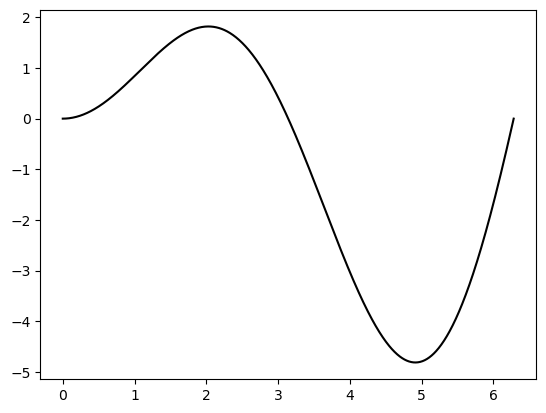

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# 创建 x 的值，范围从 0 到 2π，共 1000 个点
x = np.linspace(0, 2 * np.pi, 1000)

# 计算函数值 y
y = x * np.sin(x)

# 绘制并显示
plt.plot(x, y, 'k-')
plt.show()


使用 plt.plot() 定义颜色和线型
plt.plot() 的最后一个参数定义了线的颜色和类型，例如 'k-' 表示黑色实线。我们还可以生成散点图，例如将样式字符换成 'kx' 表示黑色叉标记：

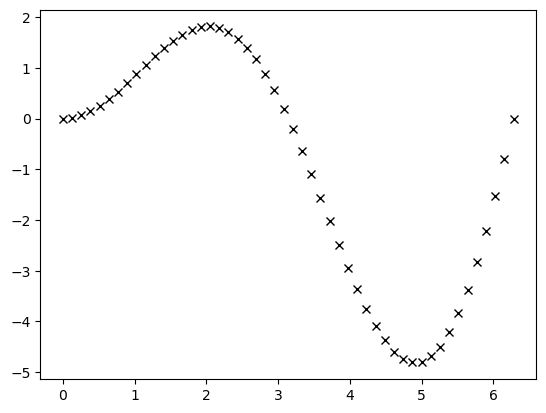

In [2]:
x = np.linspace(0, 2 * np.pi, 50)
y = x * np.sin(x)
plt.plot(x, y, 'kx')
plt.show()

练习 1

在区间 x∈[−π,π] 上分别绘制以下函数图像，并尝试不同的颜色和线型：

f1x)=sin(x)
f2x)=tan( 100/49 *x）
f3x)=sin(x)cos(2x)

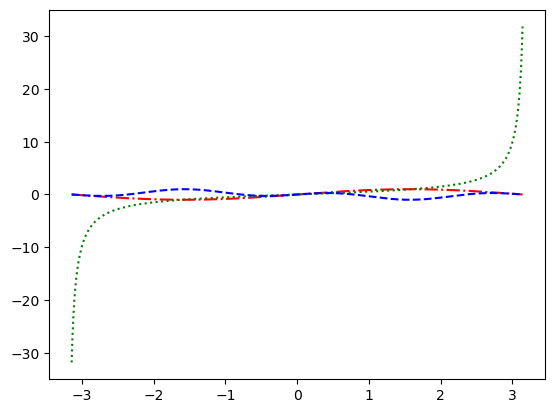

In [3]:
# Create an x-axis with 1000 points
x = np.linspace(-np.pi, np.pi, 1000)

# Evaluate the functions at all these points
f1 = np.sin(x)
f2 = np.tan(0.49 * x)
f3 = np.sin(x) * np.cos(2*x)

# Create the plots in the same axes
plt.plot(x, f1, 'r-.')
plt.plot(x, f2, 'g:')
plt.plot(x, f3, 'b--')

# Display the plot
plt.show()

14.2. 图像与坐标轴作为对象

默认情况下，如果没有已有图像，plt.plot() 会创建一个图像窗口，并添加一组坐标轴。如果再次运行 plt.plot()，则会在相同的坐标轴上重绘。因此，要在不同图像上绘制，我们可以使用 plt.subplots() 创建多个图像：

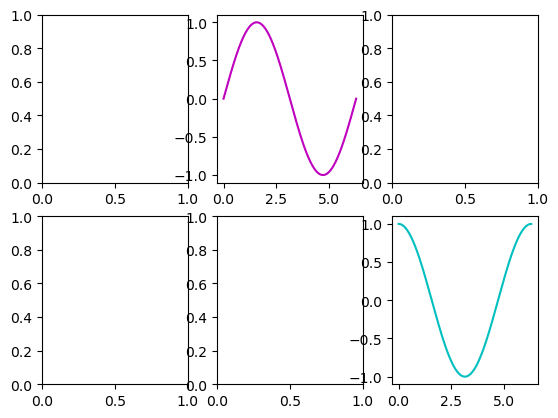

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 定义 x
x = np.linspace(0, 2 * np.pi, 1000)

# 创建图像和坐标轴
fig_1, ax_1 = plt.subplots(2, 3)

# 绘制到不同的子图
ax_1[0, 1].plot(x, np.sin(x), 'm-')
ax_1[1, 2].plot(x, np.cos(x), 'c-')

# 显示结果
plt.show()


练习 14.2
使用 plt.subplots() 函数在一个图像中绘制练习 1 中的三个函数，每个函数一个不同的子图。

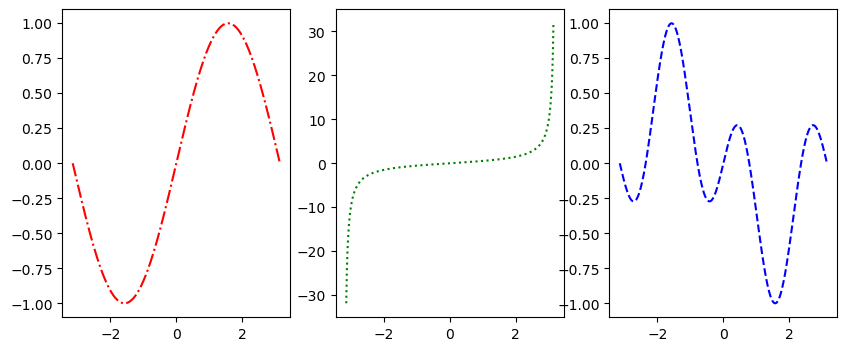

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Create an x-axis with 1000 points
x = np.linspace(-np.pi, np.pi, 1000)

# Evaluate the functions at all these points
f1 = np.sin(x)
f2 = np.tan(0.49 * x)
f3 = np.sin(x) * np.cos(2*x)

# Create a figure with 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

# Plot each function in a different subplot
ax[0].plot(x, f1, 'r-.')
ax[1].plot(x, f2, 'g:')
ax[2].plot(x, f3, 'b--')

# Display the plot
plt.show()